In [3]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
del df

NameError: name 'df' is not defined

In [5]:
df=pd.read_excel('words with occurence.xlsx')

In [6]:
df

,word,occ
0,transactions,72
1,des,71
2,vérification,65
3,compte,40
4,correction,32
...,...,...
354,traitement,1
355,web,1
356,workflow,1
357,cas,1


remove stopwords

In [8]:

from nltk.corpus import stopwords
import re
stop_words=stopwords.words('french')
punctuation=re.compile(r'[-!?,.;/:()|0-9]')

post_ponctuation=[]
for words in list(df['word']):
    word=punctuation.sub("",words)
    if len(word)>0:
        post_ponctuation.append(word)

In [9]:
df["word"]=post_ponctuation


In [10]:
df

,word,occ
0,transactions,72
1,des,71
2,vérification,65
3,compte,40
4,correction,32
...,...,...
354,traitement,1
355,web,1
356,workflow,1
357,cas,1


In [ ]:
stop_words

In [12]:
l=[]
for word in df['word']:
    if word  not  in stop_words :
        l.append(word)


In [13]:
text=str(l)
ch=""
for word in text :
    if "[" ==word or "]"==word or "'"==word:
        continue
    else:
        ch=ch+word


In [14]:
l=ch.split(",")

In [ ]:
l

Stemming words

In [16]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language='french')
def return_stem(sentence):
    return[stemmer.stem(sentence)]

In [17]:
d={}
for word in l:
    d[word]=return_stem(word)

In [ ]:
d

In [19]:
root=str(list(d.values()))

In [ ]:
root

In [21]:
root
ch=""
for word in root:
    if "[" ==word or "]"==word or "'"==word:
        continue
    else:
        ch=ch+word
root=ch.split(",")

the most common words 

In [22]:
from nltk.probability import FreqDist
fdist=FreqDist()

In [23]:

for word in root:
    
    fdist[word.lower()]+=1


In [24]:
df1=pd.DataFrame()

In [25]:
df1["word"]=fdist.keys()
df1["occurence"]=fdist.values()

In [26]:
df1

,word,occurence
0,transact,1
1,vérif,2
2,compt,1
3,correct,3
4,shop,1
...,...,...
304,trait,1
305,web,1
306,workflow,1
307,\\xa0c,1


In [27]:
fdist_top10=fdist.most_common(20)
fdist_top10

[('  remont', 5),
 ('  bloqu', 4),
 ('  correct', 3),
 ('  problem', 3),
 ('  relev', 3),
 ('  cong', 3),
 ('  vérif', 2),
 ('  chang', 2),
 ('  valid', 2),
 ('  passat', 2),
 ('  noir', 2),
 ('  command', 2),
 ('  dat', 2),
 ('  fournisseur', 2),
 ('  not', 2),
 ('  stock', 2),
 ('  vent', 2),
 ('  jaugeag', 2),
 ('  articl', 2),
 ('  verif', 2)]

In [ ]:
d

lemm data 


In [29]:
import spacy
nlp = spacy.load("fr_core_news_sm")
nlp

Embedding par mot 

In [31]:
def return_word_embedding(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le vecteur lié à chaque token
    return doc.vector

In [32]:
#test
dis={}
for word in df1['word']:
    dis[word]=return_word_embedding(word)
   

In [33]:
df1['vector']=dis.values()

In [34]:
df1

,word,occurence,vector
0,transact,1,"[-2.6062832, 0.42535257, 10.515841, 0.9206495,..."
1,vérif,2,"[-1.8738364, -1.2003666, -0.4213823, 1.1746018..."
2,compt,1,"[1.0330607, -0.82788515, -0.03483647, -0.95179..."
3,correct,3,"[-1.9591162, -1.3050681, 0.5903213, 2.3378124,..."
4,shop,1,"[-3.2386951, -0.3526811, 1.4796969, -0.3566720..."
...,...,...,...
304,trait,1,"[-4.678294, -0.6375108, 1.1358193, 3.6041768, ..."
305,web,1,"[-2.87982, 0.32486966, 2.0635486, 4.325357, -2..."
306,workflow,1,"[0.16933048, -0.3056481, 1.4185123, 4.15156, -..."
307,\\xa0c,1,"[-2.0288336, -1.5144099, 0.089063585, 2.618955..."


In [35]:
# Retourner la moyenne des vecteurs pour chaque mot
def return_mean_embedding(sentence):
    
    doc = nlp(sentence)
    # Retourner la moyenne des vecteurs pour chaque phrase
    return np.mean(doc.vector)

In [36]:
dis={}
for word in df1['word']:
    dis[word]=return_mean_embedding(word)



In [37]:
df1['mean_vector']=dis.values()

In [38]:
df1

,word,occurence,vector,mean_vector
0,transact,1,"[-2.6062832, 0.42535257, 10.515841, 0.9206495,...",-0.002751
1,vérif,2,"[-1.8738364, -1.2003666, -0.4213823, 1.1746018...",0.013990
2,compt,1,"[1.0330607, -0.82788515, -0.03483647, -0.95179...",0.013942
3,correct,3,"[-1.9591162, -1.3050681, 0.5903213, 2.3378124,...",0.008525
4,shop,1,"[-3.2386951, -0.3526811, 1.4796969, -0.3566720...",0.003231
...,...,...,...,...
304,trait,1,"[-4.678294, -0.6375108, 1.1358193, 3.6041768, ...",0.014192
305,web,1,"[-2.87982, 0.32486966, 2.0635486, 4.325357, -2...",0.017038
306,workflow,1,"[0.16933048, -0.3056481, 1.4185123, 4.15156, -...",0.012964
307,\\xa0c,1,"[-2.0288336, -1.5144099, 0.089063585, 2.618955...",0.002175


In [39]:
np.linalg.norm(return_word_embedding("Le réseau sera bientot rétabli à Marseille")-return_word_embedding("La panne réseau affecte plusieurs utilisateurs de l'opérateur"))

13.564599

Vectorisation

In [40]:
%matplotlib inline
import plotly.express as px
#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

In [ ]:
del df2

NameError: name 'df2' is not defined

In [41]:
#df1.to_excel('test.xlsx')
df2=pd.read_excel('test.xlsx')

In [43]:
df2

,Unnamed: 0,word,abatt,abid,acc,acces,achat,activ,affich,airfr,...,vivo,vérif,web,workflow,xa0,écart,écran,équip,état,îlot
0,0,transact,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,vérif,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,compt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,correct,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,shop,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,269,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,270,NaN,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
271,271,NaN,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
df_numerized=df2
for col in df_numerized.columns:
    if(df_numerized[col].dtype=='object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized

,Unnamed: 0,word,abatt,abid,acc,acces,achat,activ,affich,airfr,...,vivo,vérif,web,workflow,xa0,écart,écran,équip,état,îlot
0,0,266,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,258,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,215,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,269,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,270,-1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
271,271,-1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df2.corr()

,Unnamed: 0,word,abatt,abid,acc,acces,achat,activ,affich,airfr,...,vivo,vérif,web,workflow,xa0,écart,écran,équip,état,îlot
Unnamed: 0,1.000000,0.123624,0.040778,0.041547,-0.016927,-0.064629,-0.046163,-0.063859,-0.016157,0.042316,...,-0.046933,-0.103868,0.103098,0.103868,0.064629,0.104637,-0.050144,0.039239,-0.017696,0.040008
word,0.123624,1.000000,-0.089397,-0.086315,-0.095559,-0.096329,-0.092478,-0.094018,-0.090937,-0.078612,...,-0.097100,0.098556,-0.100951,-0.100951,-0.000813,-0.100951,-0.071545,-0.093248,-0.098640,-0.090167
abatt,0.040778,-0.089397,1.000000,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,...,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.005209,-0.003676,-0.003676,-0.003676
abid,0.041547,-0.086315,-0.003676,1.000000,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,...,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.005209,-0.003676,-0.003676,-0.003676
acc,-0.016927,-0.095559,-0.003676,-0.003676,1.000000,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,...,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.005209,-0.003676,-0.003676,-0.003676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
écart,0.104637,-0.100951,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,...,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,1.000000,-0.005209,-0.003676,-0.003676,-0.003676
écran,-0.050144,-0.071545,-0.005209,-0.005209,-0.005209,-0.005209,-0.005209,-0.005209,-0.005209,-0.005209,...,-0.005209,-0.005209,-0.005209,-0.005209,-0.005209,-0.005209,1.000000,-0.005209,-0.005209,-0.005209
équip,0.039239,-0.093248,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,...,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.005209,1.000000,-0.003676,-0.003676
état,-0.017696,-0.098640,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,...,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.003676,-0.005209,-0.003676,1.000000,-0.003676


In [48]:
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(df['word'])

In [ ]:
print(X_cv)

In [50]:
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(df2["word"])

AttributeError: 'int' object has no attribute 'lower'

In [51]:
print(X_wtf)

NameError: name 'X_wtf' is not defined

In [52]:

vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,1))
X_ntf = vectorizer_ntf.fit_transform(df2['word'])

AttributeError: 'int' object has no attribute 'lower'

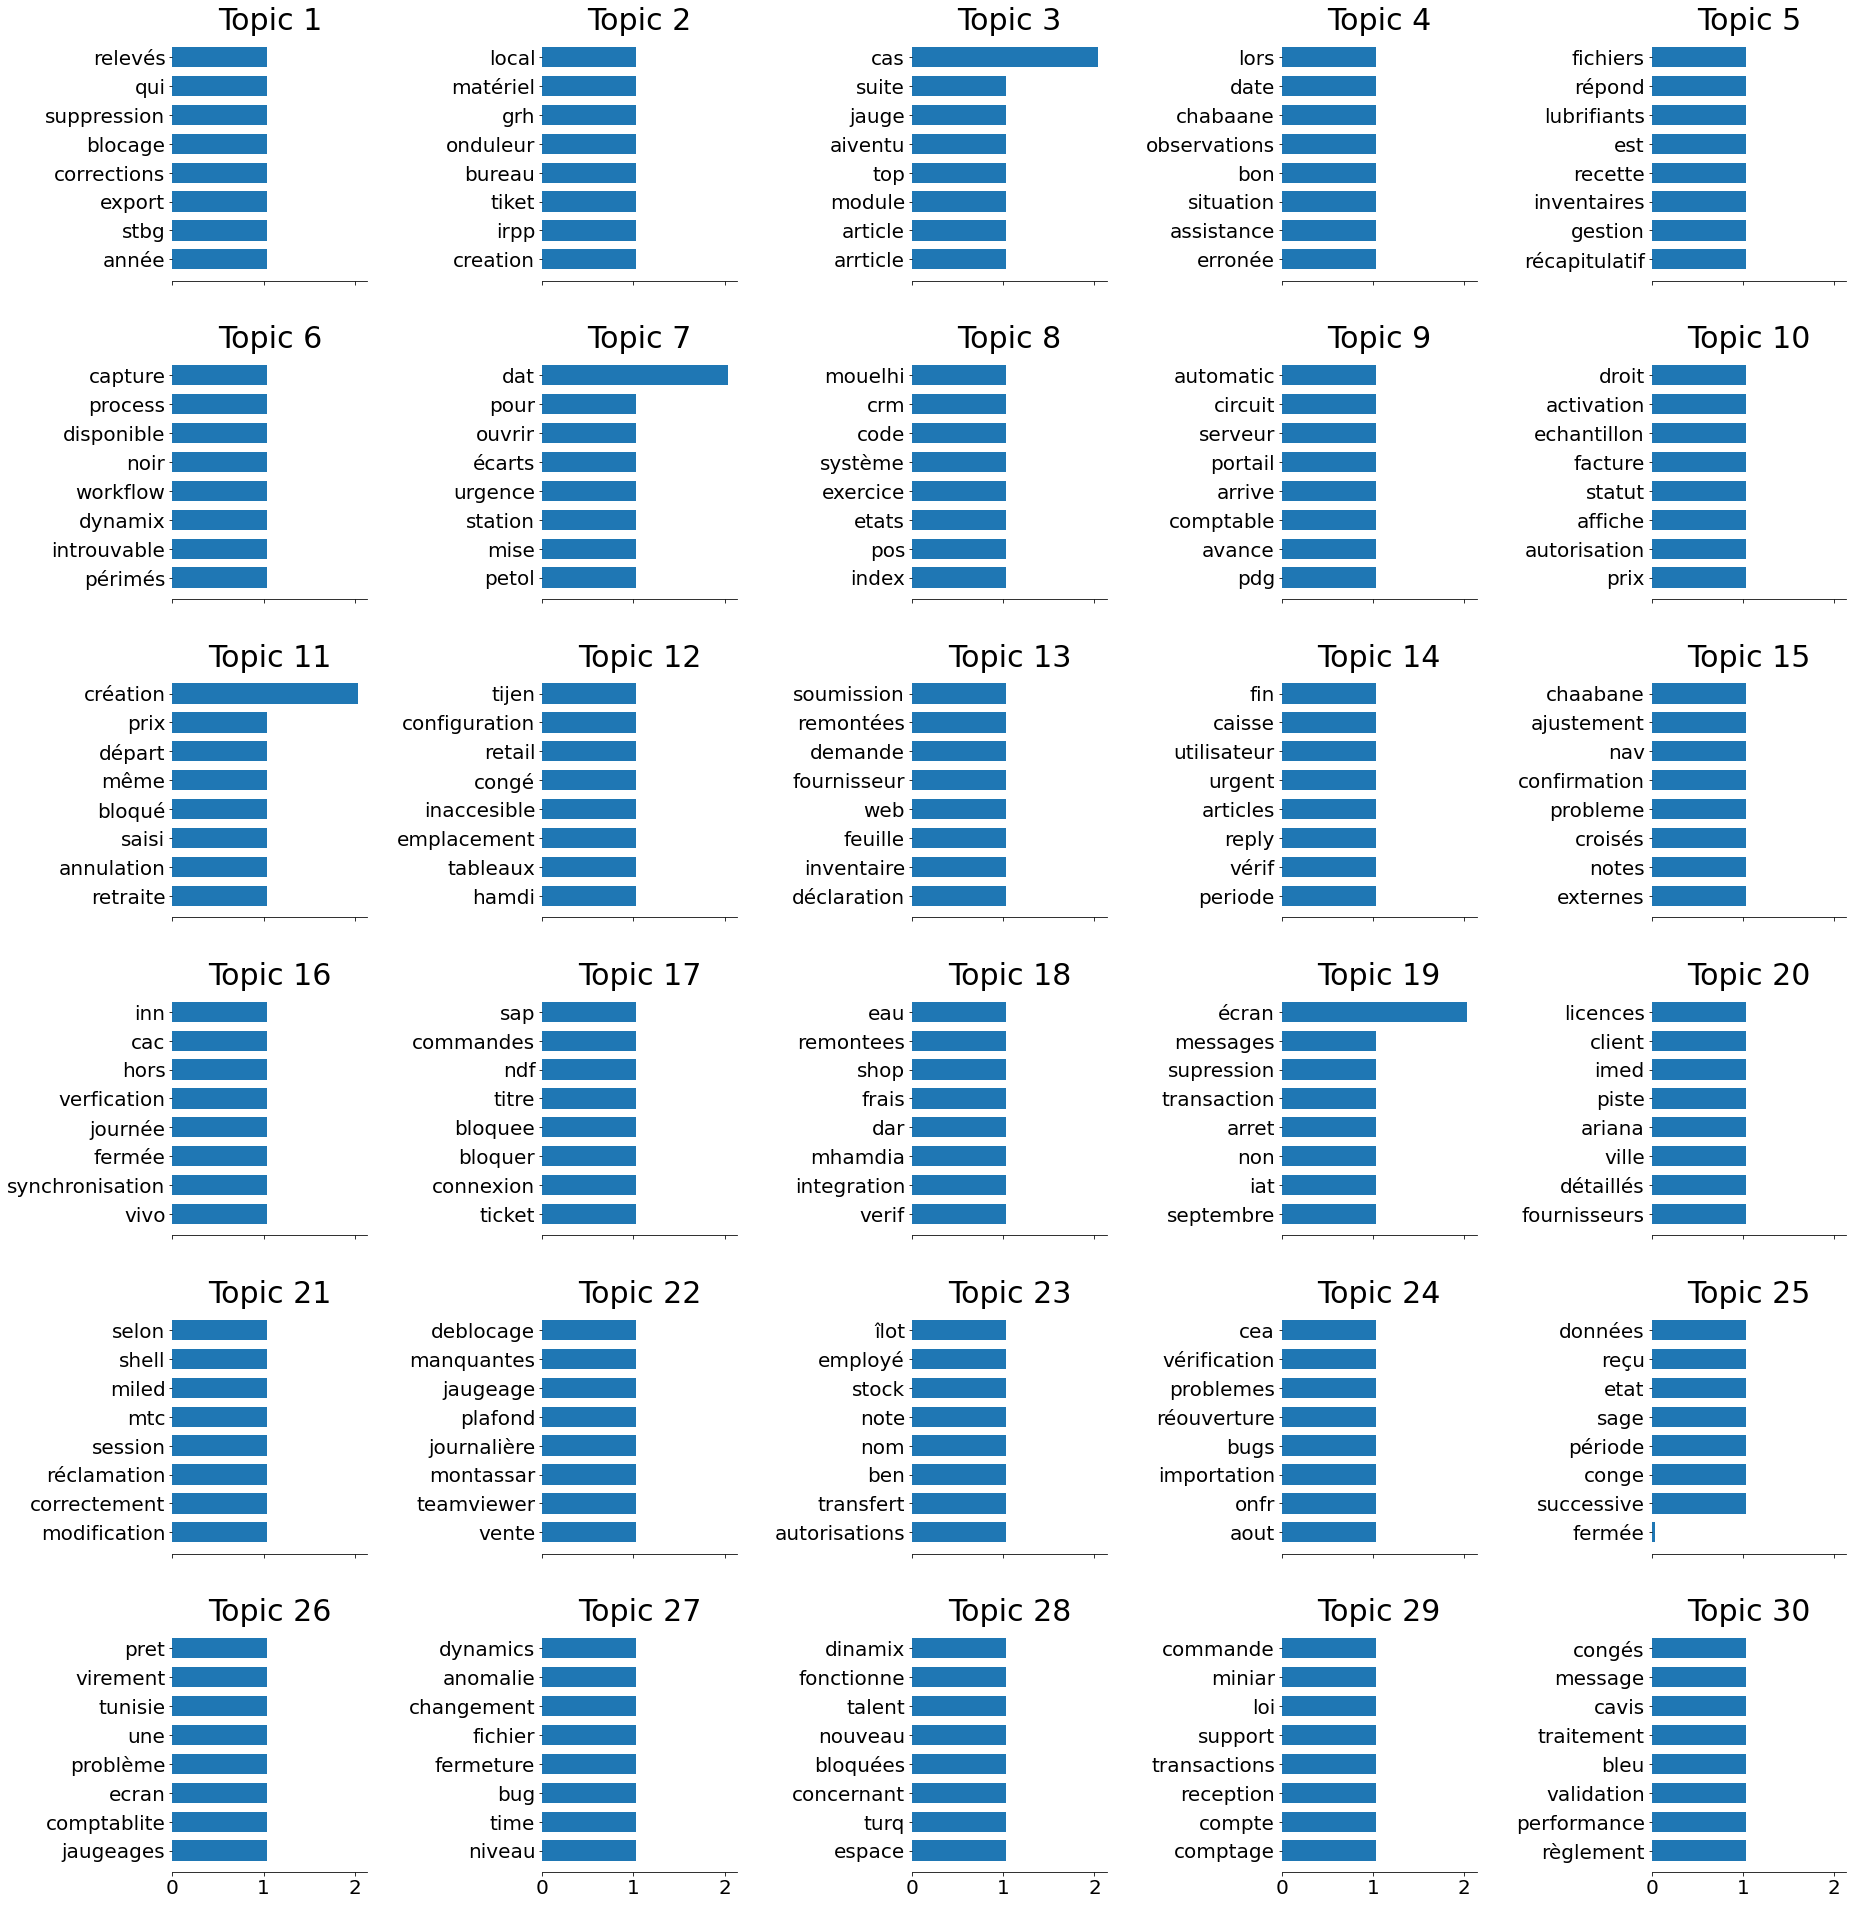

In [53]:
#LDA
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 8
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

In [ ]:
X_fuzz = pd.crosstab([df2['word'].index,df2["word"]],df2["word"]).apply(lambda col: [fuzz.token_sort_ratio(col.name, x) 
                                                                   for x in col.index.get_level_values(1)])


In [ ]:
X_fuzz.corr()

word,abatt,abid,acc,acces,achat,activ,affich,airfr,ajust,ann,...,vérif,web,workflow,écart,écran,équip,état,îlot,transact,mean_vector
word,,,,,,,,,,,,,,,,,,,,,
abatt,1.000000,0.357584,0.422589,0.256610,0.756633,0.572299,0.248900,0.146546,0.668899,0.363356,...,-0.248319,-0.064052,-0.317788,0.545252,0.212256,-0.172574,0.807162,0.128787,0.477556,NaN
abid,0.357584,1.000000,0.311666,0.068130,0.208899,0.451278,0.579114,0.393716,0.159960,0.346576,...,0.166359,-0.186395,-0.262851,0.060387,0.100698,0.169749,0.294772,-0.247705,0.093867,NaN
acc,0.422589,0.311666,1.000000,0.702391,0.712237,0.610978,0.644970,0.172630,0.317531,0.464162,...,-0.216322,-0.193286,-0.332270,0.440911,0.443273,-0.246374,0.432057,-0.238637,0.487202,NaN
acces,0.256610,0.068130,0.702391,1.000000,0.482646,0.400172,0.343031,0.028427,0.398228,0.193828,...,-0.210863,0.155859,-0.360760,0.254599,0.180802,-0.192731,0.242563,-0.245216,0.365924,NaN
achat,0.756633,0.208899,0.712237,0.482646,1.000000,0.726352,0.529841,0.140532,0.573346,0.385389,...,-0.233991,-0.223510,-0.335931,0.659250,0.375986,-0.225476,0.694292,0.070607,0.553595,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
équip,-0.172574,0.169749,-0.246374,-0.192731,-0.225476,0.043018,0.102616,0.155662,0.089030,-0.342004,...,0.289549,-0.174013,-0.026604,-0.258584,-0.428182,1.000000,-0.176550,-0.087064,-0.261014,NaN
état,0.807162,0.294772,0.432057,0.242563,0.694292,0.592217,0.289702,0.186629,0.627740,0.375571,...,-0.162430,-0.189416,-0.309544,0.529789,0.256000,-0.176550,1.000000,0.171872,0.588903,NaN
îlot,0.128787,-0.247705,-0.238637,-0.245216,0.070607,-0.034574,-0.292986,-0.225890,0.083741,-0.194179,...,-0.148540,-0.102558,0.407264,0.113472,-0.187586,-0.087064,0.171872,1.000000,-0.104731,NaN


In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
X_fuzz['mean_vector']=df2['mean_vector']

In [ ]:
clustering1.fit(X_fuzz[['mean_vector']])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').